In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df_data = pd.read_csv('../data/ogd103_stromverbrauch_swissgrid_lv_und_endv.csv', sep=',', decimal='.', thousands="'")
display(df_data.head())
df_data['Datum'] = pd.to_datetime(df_data['Datum'], utc=True)
df_data['Year'] = df_data['Datum'].dt.year
display(df_data.head())

,Datum,Landesverbrauch_GWh,Endverbrauch_GWh
0,2017-01-01,170,150
1,2017-01-02,179,162
2,2017-01-03,200,183
3,2017-01-04,202,188
4,2017-01-05,207,190


,Datum,Landesverbrauch_GWh,Endverbrauch_GWh,Year
0,2017-01-01 00:00:00+00:00,170,150,2017
1,2017-01-02 00:00:00+00:00,179,162,2017
2,2017-01-03 00:00:00+00:00,200,183,2017
3,2017-01-04 00:00:00+00:00,202,188,2017
4,2017-01-05 00:00:00+00:00,207,190,2017


In [5]:
grouped_data = df_data.groupby('Year')[['Landesverbrauch_GWh', 'Endverbrauch_GWh']].sum().reset_index()
display(grouped_data.head())
pivot_data = grouped_data.melt(id_vars=['Year'], var_name='Category', value_name='GWh')
pivot_table = pivot_data.pivot(index='Year', columns='Category', values='GWh')
display(pivot_table.head())

,Year,Landesverbrauch_GWh,Endverbrauch_GWh
0,2017,64402,56881
1,2018,63632,56283
2,2019,63401,55975
3,2020,62425,54655
4,2021,64407,56790


Category,Endverbrauch_GWh,Landesverbrauch_GWh
Year,,
2017,56881,64402
2018,56283,63632
2019,55975,63401
2020,54655,62425
2021,56790,64407


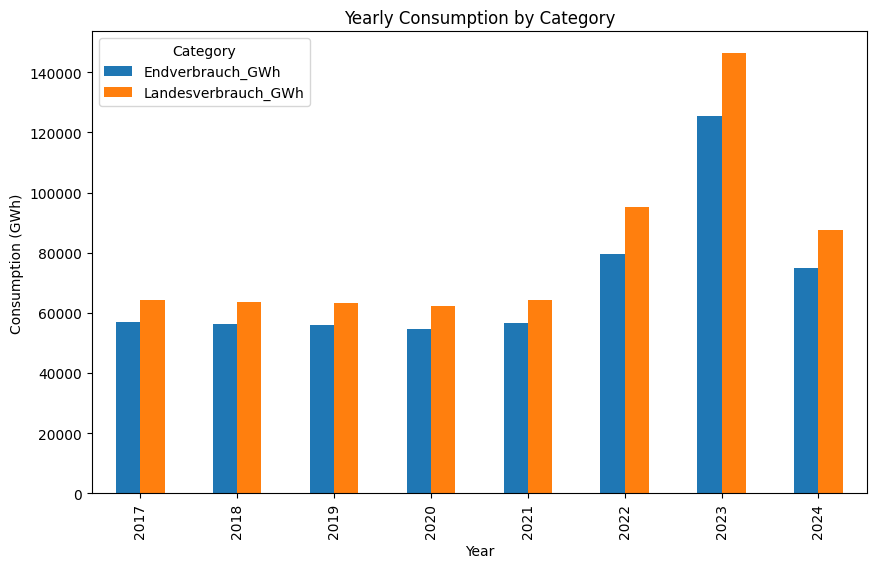

In [8]:
pivot_table.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Consumption (GWh)')
plt.title('Yearly Consumption by Category')
plt.legend(title='Category')
plt.show()